In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import pandas as pd
import json
import pathlib

def get_book_data(line):
	content = json.loads(line)
	return {
        'book_id': content['title'].replace(" ", "_").lower(),
        'source': content['source']
    }

def get_chapter_data(line):
    chapter = json.loads(line)
    return {
        'book_id': chapter['book_id'].replace(" ", "_").lower(),
        'source': chapter['source']
    }

def plot_test_lengths():

    chapters_test_split = open(pathlib.Path("../booksum/alignments/chapter-level-summary-alignments/chapter_summary_aligned_test_split.jsonl"), \
     encoding='utf-8')
    chapters_data = [get_chapter_data(line) for line in chapters_test_split]

    booksum_book_test_split = open(pathlib.Path("../booksum/alignments/book-level-summary-alignments/book_summaries_aligned_test.jsonl"), \
     encoding='utf-8')
    booksum_data = [get_book_data(line) for line in booksum_book_test_split]

    nyt_path_list = glob(os.path.normpath("processed_data/presumm/nyt/test/") + "/*")
    booksum_path_list = glob(os.path.normpath("processed_data/presumm/booksum/test/") + "/*")
    propp_learner_path_list = glob(os.path.normpath("processed_data/presumm/propp_learner/test/") + "/*")
    turning_point_path_list = glob(os.path.normpath("processed_data/presumm/turning_point/test/") + "/*")
    print("Evaluating {} NYT files".format(len(nyt_path_list)))
    print("And evaluating {} BookSum files".format(len(booksum_path_list)))
    print("And evaluating {} ProppLearner files".format(len(propp_learner_path_list)))
    print("And evaluating {} Turning Point files".format(len(turning_point_path_list)))

    nyt_lengths = []
    booksum_lengths = []
    propp_learner_lengths = []
    turning_point_lengths = []

    # for book in booksum_data:
    #     book_length = 0
    #     chapters = [x for x in chapters_data if x['book_id'].split('.')[0] == book["book_id"] and x['source'] == book["source"]]
    #     #print("Book: {} has {} chapters".format(book["book_id"], len(chapters)))
    #     for chapter in chapters:
    #         paragraph_paths = glob(os.path.normpath("processed_data/presumm/booksum/test/tp." + chapter['book_id'] + "." + chapter['source'] + "*"))
    #         for path in paragraph_paths:
    #             j = json.load(open(path))
    #             book_length += len(j["src"])
    #     booksum_lengths.append(book_length)

    # print("BookSum average length: {}".format(np.mean(booksum_lengths)))                 

    for result_file_path in nyt_path_list:
        j = json.load(open(result_file_path))
        nyt_lengths.append(len(j["src"]))
   
    
    for result_file_path in propp_learner_path_list:
        j = json.load(open(result_file_path))
        propp_learner_lengths.append(len(j["src"]))

    for result_file_path in turning_point_path_list:
        j = json.load(open(result_file_path))
        turning_point_lengths.append(len(j["src"]))

    graph_title = "Mean Lengths of Documents in Test Set"
    booksum_length = 1816.5652173913043
    nyt_length = np.mean(nyt_lengths)
    propp_learner_length = np.mean(propp_learner_lengths)
    turning_point_length = np.mean(turning_point_lengths)
    lengths = [nyt_length, propp_learner_length, turning_point_length, booksum_length]
    datasets = ["NYT","ProppLearner","Turning Point","BookSum"]
    plt.bar(datasets, lengths)
    plt.bar_label(plt.gca().containers[0], labels=[round(x) for x in lengths])
    plt.ylabel("Length (Sentences)")
    plt.title(graph_title)
    plt.savefig("datasetaveragelengths.pdf")

Evaluating 4321 NYT files
And evaluating 13851 BookSum files
And evaluating 9 ProppLearner files
And evaluating 9 Turning Point files


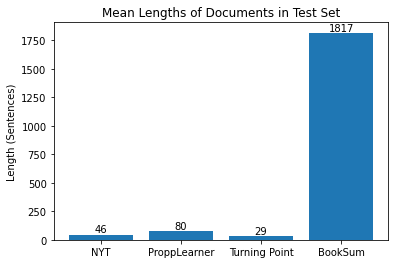

In [29]:
plot_test_lengths()